In [6]:
from sklearn import datasets
iris = datasets.load_iris()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse


In [8]:
np.mean(iris.data,axis=0)

array([ 5.84333333,  3.054     ,  3.75866667,  1.19866667])

In [9]:
df_central = (iris.data-np.mean(iris.data,axis=0))
df_central.shape

(150, 4)

In [10]:
df_scalar = (np.max(iris.data,axis=0)-np.min(iris.data,axis=0))
df_scalar.shape

(4,)

In [11]:
d_nor = (df_central/df_scalar)

In [12]:
n_clusters = 3
cluster = KMeans(n_clusters, random_state=0).fit(d_nor[:,2:])
Z = cluster.predict(d_nor[:,2:])

center = cluster.cluster_centers_
#print(center)

In [13]:
color = np.array([244, 220, 239])
color = np.vstack((color,np.array([222, 248, 252])))
color = np.vstack((color,np.array([247, 237, 200])))/255

In [14]:
label = iris.target #real lable
#name = iris.data.target_names

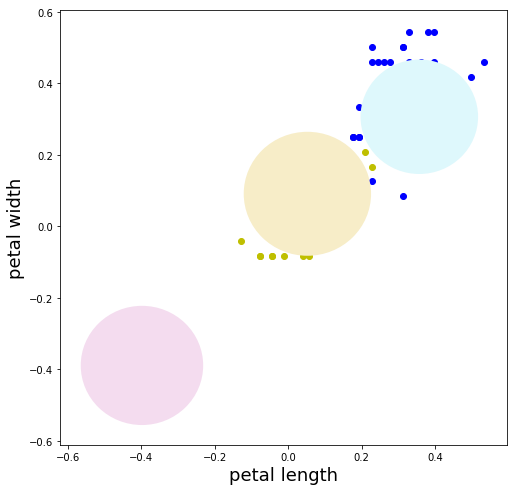

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

#for j,ele in enumerate(label):
#    plt.annotate(ele, (z[j],y[j]))

for i in range(n_clusters):
    r = np.sum(Z==i)/len(Z)
    ellipse = Ellipse(xy=(center[i,1], center[i,0]), width=1*r, height=1*r, facecolor = color[i],lw=2)
    ax.add_patch(ellipse)


c2 = ['r','y','b']
for j in range(3):
    idx = (label==j)
    z = d_nor[idx,2]
    y = d_nor[idx,3]
    plt.scatter(x = z,y= y, c=c2[j])
    
plt.ylabel('petal width',fontsize=18)
plt.xlabel('petal length',fontsize=18)
plt.show()

# SSE / silhouette (找錯誤中)

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

SSE = []
silhouette_avg=[]
silhouette_avg.append(-1) 
for n_Clusters in range(1,11):
    cluster = KMeans(n_Clusters, random_state=0).fit(d_nor[:,2:])
    Z = cluster.predict(d_nor[:,2:])
    #print(Z)
    SSE.append(cluster.inertia_)
    
    center = cluster.cluster_centers_
    #print(center)

    #silhouette_score(d_nor[:,2:], Z)
    #silhouette_avg.append()

In [44]:
plt.style.use('seaborn-bright')

fig = plt.figure(figsize=(20,5))
#生成一个坐标框，对应一个图形对象，不显示坐标轴，但刻度仍在


#設置x軸
xx=[g for g in range(1,11)]
ax = fig.add_subplot(111) #frameon= Tures

   
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)

#主畫圖區
plt.plot(xx, SSE, c='#AAAAAA',lw=3)
plt.plot(xx, SSE, c='#AAAAAA', marker='.', mew='6')

#Label
plt.title('Sum of squared errors', fontsize=30)    
#plt.xlabel('Number of k', fontsize=25)
plt.ylabel('SSE', fontsize=25)
plt.legend()


plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

/home/ipyserver/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


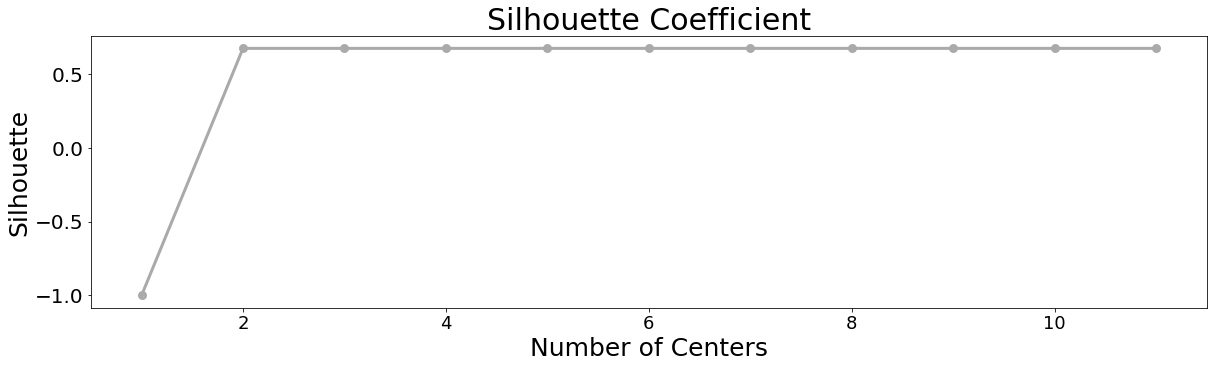

In [30]:
plt.style.use('seaborn-bright')

fig = plt.figure(figsize=(20,5))


#設置x軸
#xx=[g for g in range(1,11)]
xx = [1,2,3,4,5,6,7,8,9,10,11]
ax = fig.add_subplot(111) #frameon= Tures
#ax.set_xticks(xx)

'''
for k_x in range(1,25):
    num = str(k_x)
    k_trick.append('k='+num)
ax.set_xticklabels(k_trick)
'''
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)

#主畫圖區
plt.plot(xx, silhouette_avg, c='#AAAAAA',lw=3)
plt.plot(xx, silhouette_avg, c='#AAAAAA', marker='.', mew='6')

#Label
plt.title('Silhouette Coefficient', fontsize=30)    
plt.xlabel('Number of Centers', fontsize=25)
plt.ylabel('Silhouette', fontsize=25)
plt.legend()


plt.show()

In [39]:
d_nor 

array([[ -2.06481481e-01,   1.85833333e-01,  -3.99774011e-01,
         -4.16111111e-01],
       [ -2.62037037e-01,  -2.25000000e-02,  -3.99774011e-01,
         -4.16111111e-01],
       [ -3.17592593e-01,   6.08333333e-02,  -4.16723164e-01,
         -4.16111111e-01],
       [ -3.45370370e-01,   1.91666667e-02,  -3.82824859e-01,
         -4.16111111e-01],
       [ -2.34259259e-01,   2.27500000e-01,  -3.99774011e-01,
         -4.16111111e-01],
       [ -1.23148148e-01,   3.52500000e-01,  -3.48926554e-01,
         -3.32777778e-01],
       [ -3.45370370e-01,   1.44166667e-01,  -3.99774011e-01,
         -3.74444444e-01],
       [ -2.34259259e-01,   1.44166667e-01,  -3.82824859e-01,
         -4.16111111e-01],
       [ -4.00925926e-01,  -6.41666667e-02,  -3.99774011e-01,
         -4.16111111e-01],
       [ -2.62037037e-01,   1.91666667e-02,  -3.82824859e-01,
         -4.57777778e-01],
       [ -1.23148148e-01,   2.69166667e-01,  -3.82824859e-01,
         -4.16111111e-01],
       [ -2.89814815e